In [1]:
!git clone https://github.com/shafu0x/opical-flow-estimation-with-RAFT
%cd /content/opical-flow-estimation-with-RAFT
!mkdir inire
!mkdir inimg
!mkdir npy
!mkdir outimg

Cloning into 'opical-flow-estimation-with-RAFT'...
remote: Enumerating objects: 169, done.
remote: Total 169 (delta 0), reused 0 (delta 0), pack-reused 169
Receiving objects: 100% (169/169), 93.41 MiB | 25.99 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/opical-flow-estimation-with-RAFT


In [ ]:
import os
import shutil

input_directory = '/content/opical-flow-estimation-with-RAFT/demo-frames'  # Replace with the path to your input directory
output_directory = '/content/opical-flow-estimation-with-RAFT/inire'

os.makedirs(output_directory, exist_ok=True)
files = os.listdir(input_directory)
files.sort()


counter = 0

for filename in files:

    _, ext = os.path.splitext(filename)

    # Check if the file is an image (PNG or JPG)
    if ext.lower() in ['.png', '.jpg', '.jpeg']:
        # Generate the new filename with sequential numbering
        new_filename = f"{counter:d}.jpg"  # Example: 001.jpg

        # Create the full paths for the old and new file
        old_path = os.path.join(input_directory, filename)
        new_path = os.path.join(output_directory, new_filename)

        # Copy the file to the output directory with the new name
        shutil.copy(old_path, new_path)

        print(f'Renamed {filename} to {new_filename}')

        # Increment the counter
        counter += 1

print('Renaming complete!')


In [ ]:
%cd /content/opical-flow-estimation-with-RAFT
!/content/opical-flow-estimation-with-RAFT/download_models.sh

In [ ]:
%cd /content/opical-flow-estimation-with-RAFT
!python3 run.py --images_dir='/content/opical-flow-estimation-with-RAFT/inire' --output_dir='/content/opical-flow-estimation-with-RAFT/npy'

In [ ]:
import sys
sys.path.append('core')
from utils import flow_viz
from pathlib import Path
import numpy as np
from PIL import Image
import torch
import click

def vis(npy_dir, output_dir):
    npy_dir = Path(npy_dir)
    output_dir = Path(output_dir)

    npy_files = list(npy_dir.glob('*.npy'))

    for i, npy_file in enumerate(npy_files):
        f = str(npy_file)
        of = np.load(f)
        of = torch.from_numpy(of)
        of = of[0].permute(1, 2, 0).numpy()
        of = flow_viz.flow_to_image(of)
        img = Image.fromarray(of)
        output_f = output_dir / (npy_file.stem + '.jpg')  # Corrected output filename
        img.save(output_f)

        if i % 20 == 0:
            print(f'{i}/{len(npy_files)}')

if __name__ == '__main__':
    npy_dir = '/content/opical-flow-estimation-with-RAFT/npy'
    output_dir = '/content/opical-flow-estimation-with-RAFT/outimg'  # You can specify a different output directory if needed
    vis(npy_dir, output_dir)


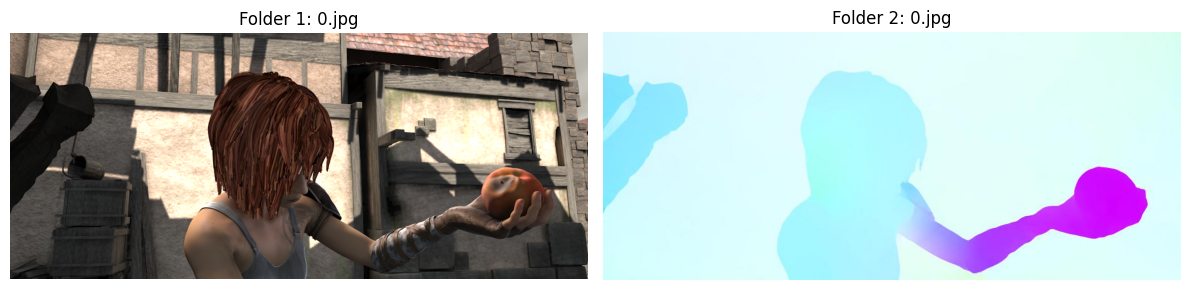

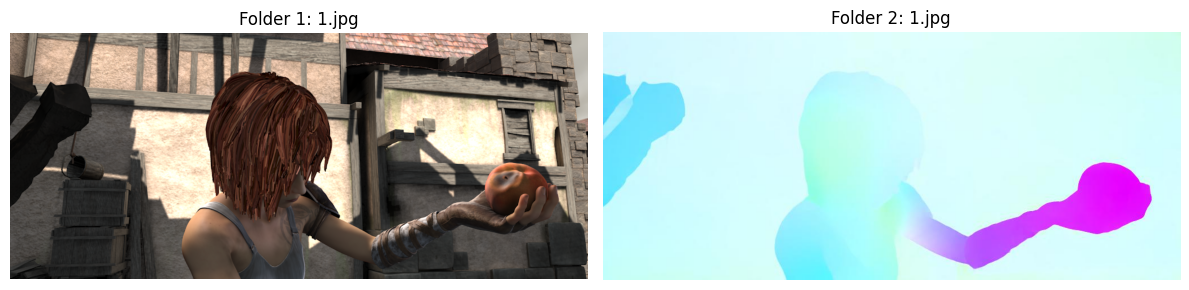

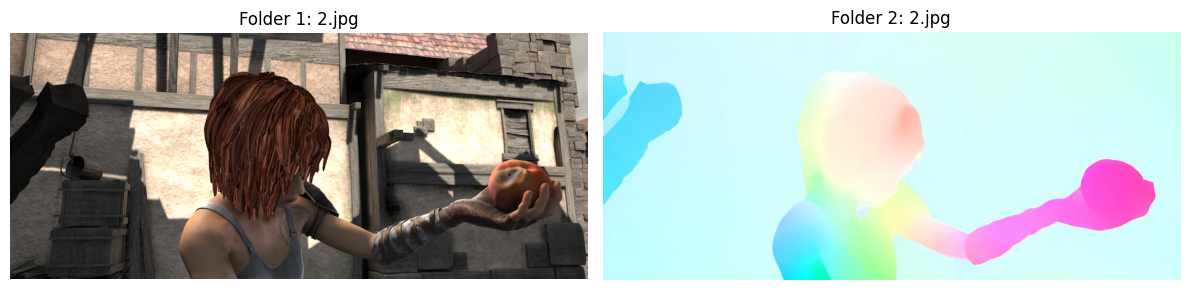

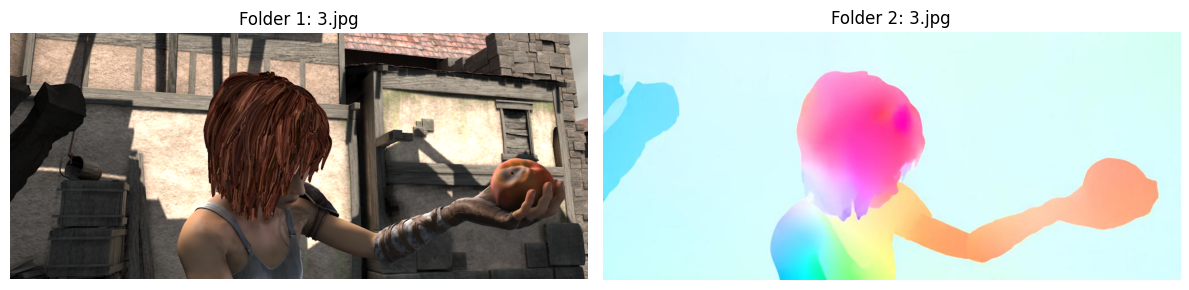

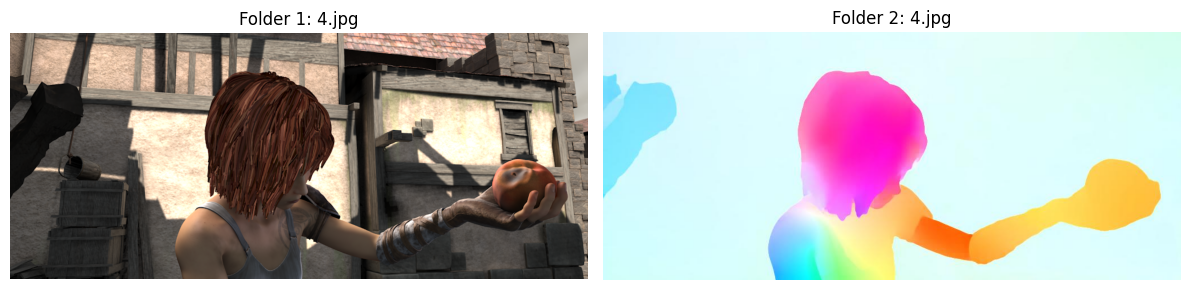

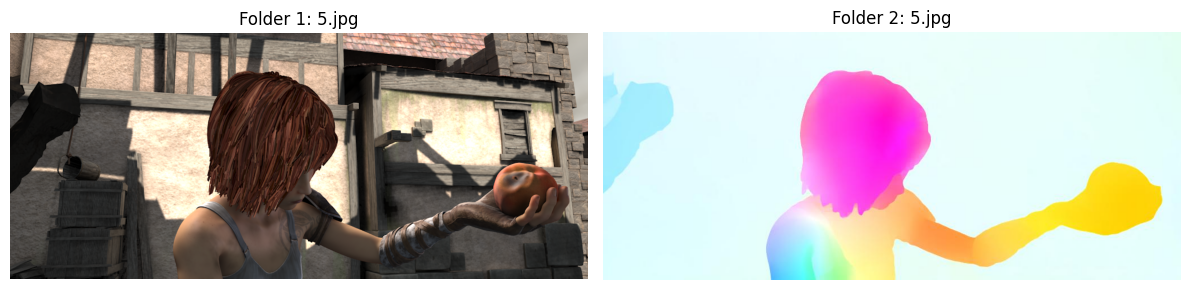

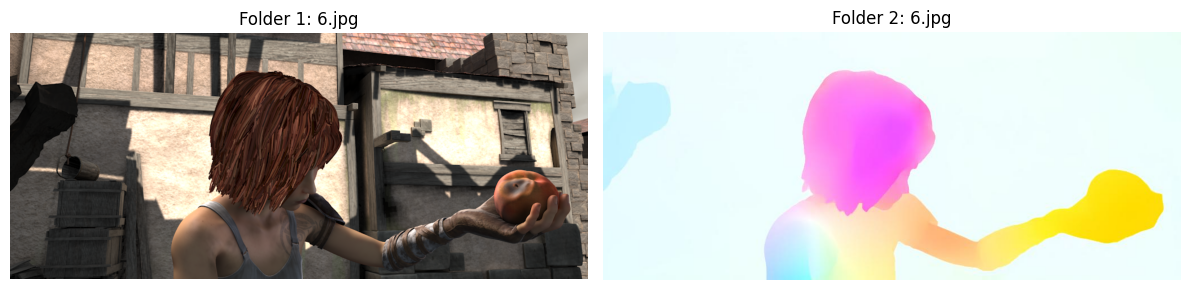

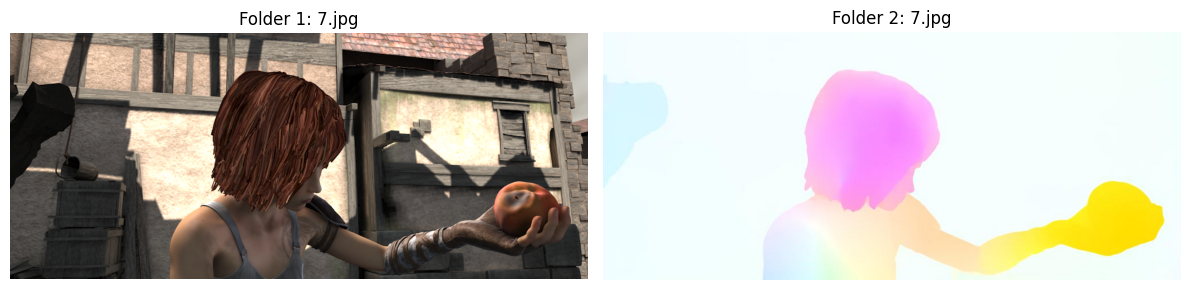

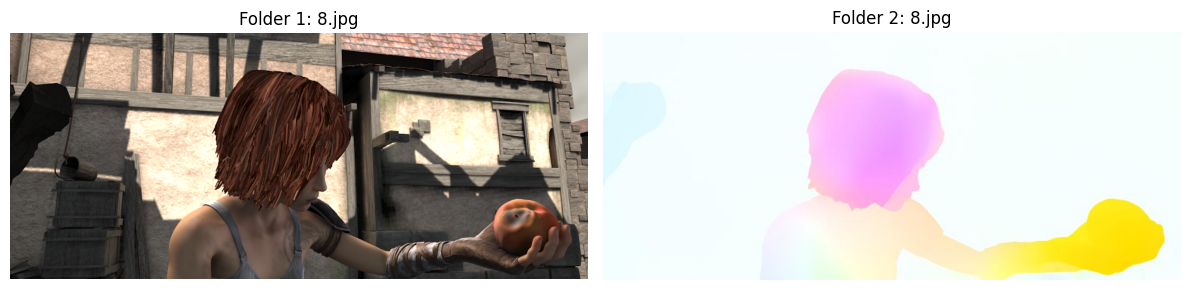

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

folder1_path = '/content/opical-flow-estimation-with-RAFT/inire'  # Path to the first folder
folder2_path = '/content/opical-flow-estimation-with-RAFT/outimg'  # Path to the second folder

# Get a list of image filenames from each folder
folder1_image_files = [filename for filename in os.listdir(folder1_path) if filename.endswith(('jpg', 'jpeg', 'png'))]
folder2_image_files = [filename for filename in os.listdir(folder2_path) if filename.endswith(('jpg', 'jpeg', 'png'))]

# Sort the lists of image filenames
folder1_image_files.sort()
folder2_image_files.sort()


for image_file1, image_file2 in zip(folder1_image_files, folder2_image_files):
    img_path1 = os.path.join(folder1_path, image_file1)
    img_path2 = os.path.join(folder2_path, image_file2)

    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Folder 1: ' + image_file1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title('Folder 2: ' + image_file2)
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:

!pip install Pillow
from PIL import Image
import os

#Specify the Directory Path Containing Your Images
image_dir_path = '/content/opical-flow-estimation-with-RAFT/inire'  # Replace with the actual directory path


image_files = [os.path.join(image_dir_path, file_name) for file_name in os.listdir(image_dir_path) if file_name.lower().endswith(('jpg', 'jpeg', 'png', 'gif'))]
image_files.sort()  # Sort the image files if needed

#Create the GIF
gif_path = 'input.gif'

# Create a list to store image frames
frames = []

for image_file in image_files:
    img = Image.open(image_file)
    frames.append(img)

# Save the GIF
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=500, loop=0)


from google.colab import files
files.download(gif_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

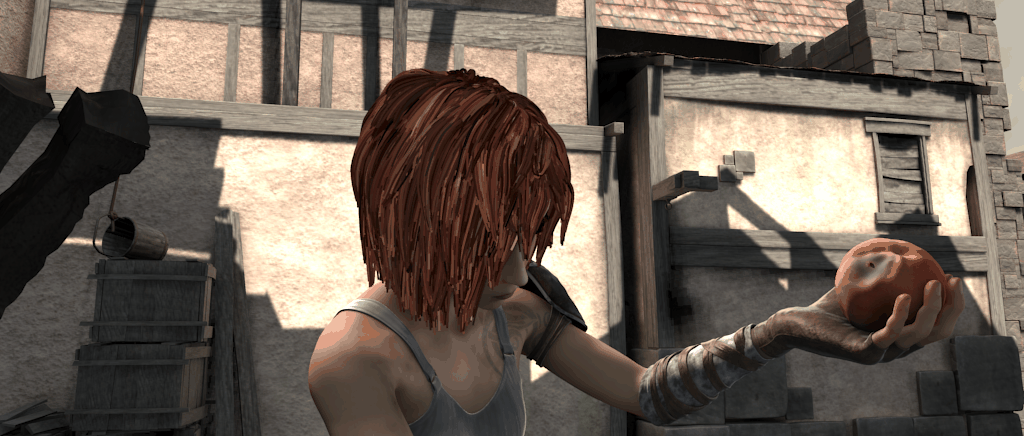

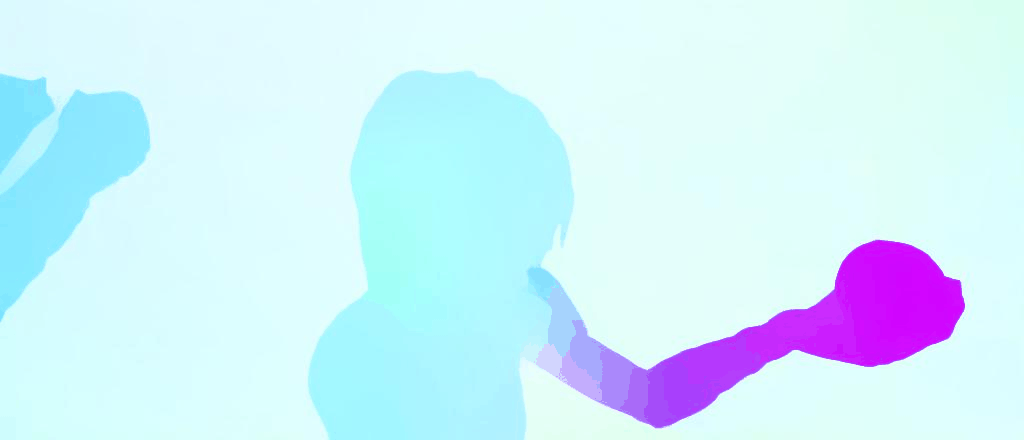

In [ ]:
from IPython.display import Image, display


gif_path_1 = '/content/opical-flow-estimation-with-RAFT/input.gif'
gif_path_2 = '/content/opical-flow-estimation-with-RAFT/output.gif'


display(Image(filename=gif_path_1))


display(Image(filename=gif_path_2))

